In [47]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [11]:
barcodes = pickle.load( open('./Library Files/asyn_consensus_barcode_dictionary_180404.pkl.txt', 'rb') )

In [12]:
barcodes

{'TATTTACTCATTCAAATTTTTAGTAA': (0, 'WT'),
 'GTGAAGCTAAAGAGAGACACGTTAAC': (139, 'R'),
 'TCAATGACATACAACGAGGTTAAATT': (137, 'T'),
 'TTTTTACCACCAGTGGCTGGCCTATA': (67, 'R'),
 'TCCGGATTTGGATAGCGTCCCGAACG': (73, 'V'),
 'CTTCCATATGCTAACAGCCCTAAGGC': (113, 'I'),
 'CGTAGGTAAGTAGGAATTGAAGCAAA': (38, 'F'),
 'ACTAACTCTTGATAGCGTTACAGAAA': (128, 'E'),
 'TAAGTTAAATTATGCTCATACACATA': (0, 'WT'),
 'TAATGTGGGATGACGTTTAACGATTA': (42, 'C'),
 'CAAAAACGGGATTGGCAAAAGATTAC': (39, 'L'),
 'GTTGCGTCAACAATGACGAGACTACT': (127, 'F'),
 'TTTAGCAAACAAATTAAGAGTACGAA': (88, 'P'),
 'TGTCACGACCTAATGACAATTGTGGT': (31, 'C'),
 'GACACCCAGGTCAGCACTGAGCACTC': (7, 'Q'),
 'GACACCCAGGTCAGCACTGAGCACTA': (7, 'Q'),
 'TATAGTGAATGCGCTAGAGGATGTAA': (5, 'G'),
 'ACGCTGAATCAACAAGGTAAGACGCA': (137, 'R'),
 'CGTTTCTGTTCGACCCAGACAGACAT': (106, 'N'),
 'CATTTAAGGTGAACTTAACCAAGGAT': (138, 'D'),
 'TGCGTAAGTCCTAAGACAATCAAGAT': (17, 'C'),
 'GAGAGTAAGCCAACCTTCGCCAGAAT': (123, 'P'),
 'CATTTAAGGTGAACTTAACCAAGGAA': (138, 'D'),
 'TATCAACCTGGAAACTAAGAATTGG

In [16]:
by_site = {} #structure will be dictionary of dictionaries(sites) of dictionaries(symbols of changes) of lists()
for seq,info in barcodes.items():
    site,symbol = info
    if site in by_site.keys():
        site_dict = by_site[site]
        if symbol in site_dict.keys():
            site_dict[symbol].append(seq)
        else:
            site_dict[symbol] = [seq]
    else:
        by_site[site] = {
            symbol: [seq]
        }
len(by_site)

141

In [27]:
for site,stuff in sorted(list(by_site.items()))[:10]:
    print(site,  'number of aas', len(stuff.keys()))
    for aa,seqs in sorted(stuff.items()):
        print('   ',aa,':',len(seqs),'barcodes')
        

0 number of aas 1
    WT : 1053 barcodes
1 number of aas 14
    A : 8 barcodes
    C : 10 barcodes
    D : 14 barcodes
    E : 16 barcodes
    F : 21 barcodes
    H : 1 barcodes
    I : 5 barcodes
    K : 1 barcodes
    L : 77 barcodes
    N : 2 barcodes
    P : 2 barcodes
    S : 20 barcodes
    T : 22 barcodes
    W : 13 barcodes
2 number of aas 18
    * : 11 barcodes
    A : 8 barcodes
    C : 27 barcodes
    F : 14 barcodes
    G : 6 barcodes
    H : 9 barcodes
    I : 5 barcodes
    K : 1 barcodes
    L : 13 barcodes
    M : 5 barcodes
    P : 50 barcodes
    Q : 31 barcodes
    R : 18 barcodes
    S : 5 barcodes
    T : 2 barcodes
    V : 4 barcodes
    W : 15 barcodes
    Y : 5 barcodes
3 number of aas 20
    * : 46 barcodes
    A : 28 barcodes
    C : 24 barcodes
    D : 4 barcodes
    E : 6 barcodes
    F : 21 barcodes
    G : 8 barcodes
    H : 4 barcodes
    I : 21 barcodes
    K : 11 barcodes
    L : 13 barcodes
    M : 6 barcodes
    N : 7 barcodes
    P : 21 barcodes
    

In [44]:
numbers_of_mutations_made = [ len(stuff.keys()) for site,stuff in sorted(list(by_site.items())) ]    

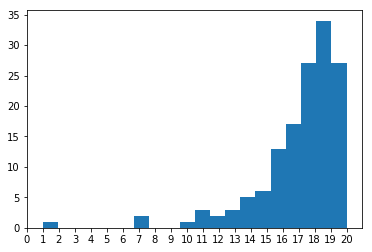

In [43]:
plt.hist(numbers_of_mutations_made,bins=20)
plt.xticks(range(0,21))
plt.show()

In [75]:
heatmap_array = np.zeros([21,141])
aa_order = ["*", "A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T","W","Y","V"]
for j,data in sorted(by_site.items()):
    for i,aa in enumerate(aa_order):
        if aa in data.keys():
            heatmap_array[i][j] = len(data[aa])

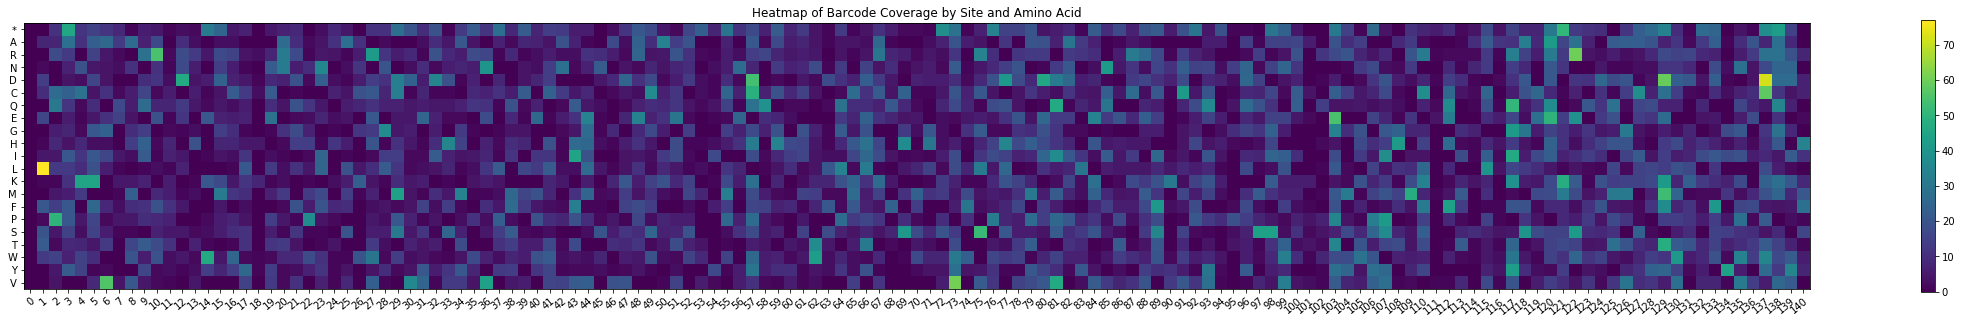

In [86]:
fig, ax = plt.subplots(figsize=(40,5))
im = ax.imshow(heatmap_array)
ax.set_yticks(range(len(aa_order)))
ax.set_xticks(np.arange(141))
ax.set_yticklabels(aa_order)

plt.setp(ax.get_xticklabels(), rotation=40, ha="right",
         rotation_mode="anchor")

# for i,row in enumerate(heatmap_array):
#     for j,col in enumerate(row):
#         ax.text(i,j,str( heatmap_array[i,j] ) )
fig.colorbar(im)
ax.set_title("Heatmap of Barcode Coverage by Site and Amino Acid")

plt.savefig('barcodes.png', bbox_inches='tight')
plt.show()